In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from typing import List
import statistics as st
import scipy.stats
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

### Train csv

In [2]:
train = pd.read_csv('train_set.csv', index_col=0, sep=';').reset_index()
train.shape

(6000, 2)

In [3]:
train

,client_id,target
0,75063019,0
1,86227647,1
2,6506523,0
3,50615998,0
4,95213230,0
...,...,...
5995,71577803,0
5996,8128547,1
5997,26055781,0
5998,73504380,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   client_id  6000 non-null   int64
 1   target     6000 non-null   int64
dtypes: int64(2)
memory usage: 93.9 KB


In [6]:
train.isnull().sum().any()

False

In [7]:
train.describe()

,client_id,target
count,6.000000e+03,6000.000000
mean,5.102984e+07,0.443333
std,2.881391e+07,0.496820
min,2.289900e+04,0.000000
25%,2.612906e+07,0.000000
50%,5.164080e+07,0.000000
75%,7.590927e+07,1.000000
max,9.999124e+07,1.000000


In [8]:
train_set = pd.read_csv('train_set.csv', index_col=0, delimiter = ";")
train_set.shape

(6000, 1)

In [9]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 75063019 to 1846496
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  6000 non-null   int64
dtypes: int64(1)
memory usage: 93.8 KB


In [10]:
train_set

,target
client_id,
75063019,0
86227647,1
6506523,0
50615998,0
95213230,0
...,...
71577803,0
8128547,1
26055781,0


### Transactions

In [11]:
transactions = pd.read_csv('transactions.csv', delimiter = ";")
transactions.shape

(130039, 5)

In [12]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130039 entries, 0 to 130038
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   client_id  130039 non-null  int64  
 1   datetime   130039 non-null  object 
 2   code       130039 non-null  int64  
 3   type       130039 non-null  int64  
 4   sum        130039 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 5.0+ MB


In [14]:
transactions.isnull().sum().any()

False

In [284]:
transactions.drop_duplicates()

,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47
2,21717441,55 13:38:47,6011,2010,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87
...,...,...,...,...,...
130034,15836839,147 11:50:53,5411,1010,-26344.59
130035,28369355,305 11:59:34,4829,2330,-24705.07
130036,40949707,398 21:13:58,5411,1110,-40353.72
130037,7174462,409 13:58:14,5411,1010,-25536.06


In [285]:
transactions.nunique()

client_id      8656
datetime     114770
code            175
type             67
sum           27450
dtype: int64

### codes

In [15]:
codes = pd.read_csv('codes.csv', sep = ';')

In [16]:
codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   code              184 non-null    int64 
 1   code_description  184 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [283]:
codes.head()

,code,code_description
0,5944,"Магазины по продаже часов, ювелирных изделий и..."
1,5621,Готовые сумочные изделия
2,5697,"Услуги по переделке, починке и пошиву одежды"
3,7995,Транзакции по азартным играм
4,5137,"Мужская, женская и детская спец-одежда"


In [16]:
codes.isnull().sum().any()

False

In [19]:
codes.describe()

,code
count,184.000000
mean,6046.793478
std,1470.328104
min,742.000000
25%,5208.250000
50%,5813.500000
75%,7283.000000
max,9402.000000


### types

In [22]:
types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   type              155 non-null    int64 
 1   type_description  155 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [281]:
types.head()

,type,type_description
0,8001,Установление расх. лимита по карте
1,2411,Перевод с карты на счет др.лица в одном тер. б...
2,4035,н/д(нет данных)
3,3001,Комиссия за обслуживание ссудного счета
4,2420,Перевод с карты на счет физ.лица в другом тер....


In [282]:
types.isnull().sum().any()

False

In [25]:
types.describe()

,type
count,155.000000
mean,10819.045161
std,80000.258847
min,1000.000000
25%,2385.500000
50%,4040.000000
75%,7027.500000
max,999999.000000


In [339]:
merged_table = transactions.merge(codes,on='code',how='left')
merged_table = merged_table.merge(types,on='type',how='left')
merged_table

,client_id,datetime,code,type,sum,code_description,type_description
0,96372458,421 06:33:15,6011,2010,-561478.94,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ
1,24567813,377 17:20:40,6011,7010,67377.47,Финансовые институты — снятие наличности автом...,Взнос наличных через АТМ (в своем тер.банке)
2,21717441,55 13:38:47,6011,2010,-44918.32,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ
3,14331004,263 12:57:08,6011,2010,-3368873.66,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ
4,85302434,151 10:34:12,4814,1030,-3368.87,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы
...,...,...,...,...,...,...,...
130034,15836839,147 11:50:53,5411,1010,-26344.59,"Бакалейные магазины, супермаркеты",Покупка. POS
130035,28369355,305 11:59:34,4829,2330,-24705.07,Денежные переводы,Списание с карты по операции “перевода с карты...
130036,40949707,398 21:13:58,5411,1110,-40353.72,"Бакалейные магазины, супермаркеты",Покупка. POS
130037,7174462,409 13:58:14,5411,1010,-25536.06,"Бакалейные магазины, супермаркеты",Покупка. POS


In [340]:
merged_table.describe()

,client_id,code,type,sum
count,1.300390e+05,130039.000000,130039.000000,1.300390e+05
mean,5.086859e+07,5594.629996,2489.372135,-1.812909e+04
std,2.872854e+07,606.087084,2253.296578,5.584445e+05
min,2.289900e+04,742.000000,1000.000000,-4.150030e+07
25%,2.577174e+07,5211.000000,1030.000000,-2.244916e+04
50%,5.235837e+07,5641.000000,1110.000000,-5.502490e+03
75%,7.506302e+07,6010.000000,2370.000000,-1.122960e+03
max,9.999968e+07,9402.000000,8145.000000,6.737747e+07


In [341]:
merged_table.isna().any()

client_id           False
datetime            False
code                False
type                False
sum                 False
code_description    False
type_description     True
dtype: bool

In [343]:
merged_table.dropna(inplace=True)
merged_table.isna().any()


client_id           False
datetime            False
code                False
type                False
sum                 False
code_description    False
type_description    False
dtype: bool

# Explanatory data analysis. Exploring the features, visualizations etc.

In [298]:
merged_table['days'] = merged_table.datetime.str[:-9]

In [299]:
merged_table

,client_id,datetime,code,type,sum,code_description,type_description,days
0,96372458,421 06:33:15,6011,2010,-561478.94,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ,421
1,24567813,377 17:20:40,6011,7010,67377.47,Финансовые институты — снятие наличности автом...,Взнос наличных через АТМ (в своем тер.банке),377
2,21717441,55 13:38:47,6011,2010,-44918.32,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ,55
3,14331004,263 12:57:08,6011,2010,-3368873.66,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ,263
4,85302434,151 10:34:12,4814,1030,-3368.87,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы,151
...,...,...,...,...,...,...,...,...
130034,15836839,147 11:50:53,5411,1010,-26344.59,"Бакалейные магазины, супермаркеты",Покупка. POS,147
130035,28369355,305 11:59:34,4829,2330,-24705.07,Денежные переводы,Списание с карты по операции “перевода с карты...,305
130036,40949707,398 21:13:58,5411,1110,-40353.72,"Бакалейные магазины, супермаркеты",Покупка. POS,398
130037,7174462,409 13:58:14,5411,1010,-25536.06,"Бакалейные магазины, супермаркеты",Покупка. POS,409


In [300]:
count_days = merged_table['days'].value_counts()
count_days.head()

448    434
440    405
410    404
441    398
314    398
Name: days, dtype: int64

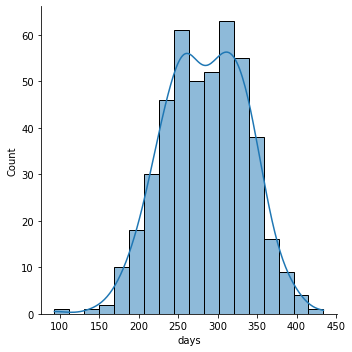

In [301]:
sns.displot(data=count_days,  kde=True)

In [306]:
merged_table['days'] = merged_table['days'].astype('int')

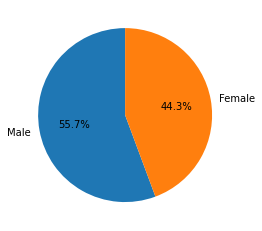

In [297]:
x = train['target'].value_counts()

plt.pie(x, labels=['Male', 'Female'], startangle=90, autopct='%.1f%%');

In [336]:
print("code_description has {} unique values".format(len(merged_table['code_description'].unique())))
print("Top 5 values are: {}".format(', '.join(merged_table['code_description'].value_counts().index[:5])))
print("type_description has {} unique values".format(len(merged_table['type_description'].unique())))
print("Top 5 values are: {}".format(', '.join(merged_table['type_description'].value_counts().index[:5])))

code_description has 175 unique values
Top 5 values are: Финансовые институты — снятие наличности автоматически, Финансовые институты — снятие наличности вручную, Звонки с использованием телефонов, считывающих магнитную ленту, Бакалейные магазины, супермаркеты, Денежные переводы
type_description has 57 unique values
Top 5 values are: Покупка. POS , Выдача наличных в АТМ, Оплата услуги. Банкоматы, Перевод на карту (с карты) через Мобильный банк (без взимания комиссии с отправителя), Списание с карты на карту по операции <перевода с карты на карту> через Мобильный банк (без комиссии)


<AxesSubplot:>

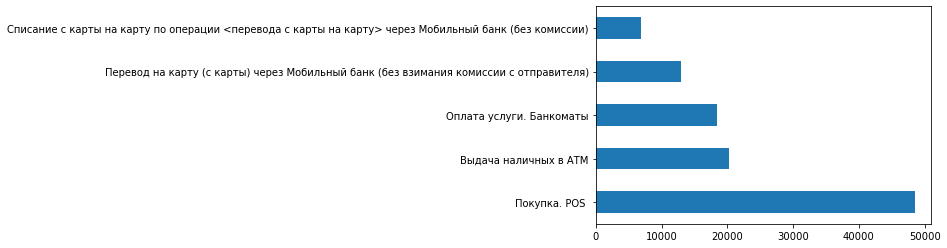

In [305]:
merged_table['type_description'].value_counts()[0:5].plot.barh()

<AxesSubplot:>

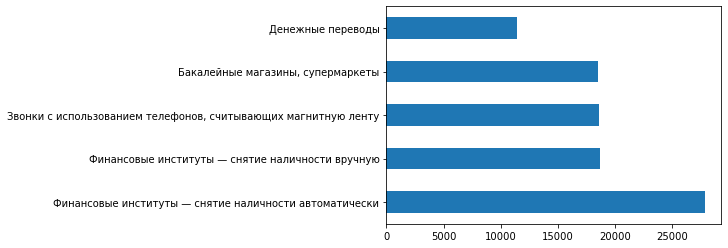

In [304]:
merged_table['code_description'].value_counts()[0:5].plot.barh()

# 3. Feature Engineering

### RFM method:

New dataframe which contains clients

In [311]:
client_id_list = list(transactions['client_id'].unique())
clients = pd.DataFrame(client_id_list, columns=['client_id'])
clients.head(5)

,client_id
0,96372458
1,24567813
2,21717441
3,14331004
4,85302434


To calculate **recency** we can split column 'datetime' into 2 column: day and time

In [312]:
merged_table['time'] = transactions.datetime.apply(lambda x: pd.Series(str(x).split(" ")))[1]
merged_table.head(5)

,client_id,datetime,code,type,sum,code_description,type_description,days,time
0,96372458,421 06:33:15,6011,2010,-561478.94,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ,421,06:33:15
1,24567813,377 17:20:40,6011,7010,67377.47,Финансовые институты — снятие наличности автом...,Взнос наличных через АТМ (в своем тер.банке),377,17:20:40
2,21717441,55 13:38:47,6011,2010,-44918.32,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ,55,13:38:47
3,14331004,263 12:57:08,6011,2010,-3368873.66,Финансовые институты — снятие наличности автом...,Выдача наличных в АТМ,263,12:57:08
4,85302434,151 10:34:12,4814,1030,-3368.87,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы,151,10:34:12


In [313]:
recent_day = max(merged_table['days'])
print(recent_day)

456


The recent transaction was made at 456-th day. Then, we will subtract each day in the data frame from this value to calculate the other 'recencies'.

In [314]:
days = pd.DataFrame(merged_table.groupby('client_id')['days'].max()).reset_index() #finding the latest transaction
merged_days = pd.merge(clients, days)
merged_days['recency'] = recent_day - merged_days['days']
clients['recency'] = merged_days['recency']
clients.head(5)

,client_id,recency
0,96372458,8
1,24567813,57
2,21717441,8
3,14331004,5
4,85302434,40


To calculate **frequency** we will count number of transactions of each client

In [315]:
frequency = pd.DataFrame(merged_table.groupby('client_id')['datetime'].count()).reset_index()
merged_frequency = pd.merge(clients, frequency).rename(columns={'datetime':'frequency'})
clients['frequency'] = merged_frequency['frequency']
clients.head(5)

,client_id,recency,frequency
0,96372458,8,13
1,24567813,57,14
2,21717441,8,15
3,14331004,5,23
4,85302434,40,8


For **monetary value** we will sum all transactions for each client.

In [316]:
summary = pd.DataFrame(merged_table.groupby('client_id')['sum'].sum()).reset_index()
merged_summary = pd.merge(clients, summary).rename(columns={'sum':'monetary_value'})
clients['monetary_value'] = merged_summary['monetary_value']
clients_df = clients
clients.head(5)

,client_id,recency,frequency,monetary_value
0,96372458,8,13,-1102812.03
1,24567813,57,14,-488237.85
2,21717441,8,15,-3135792.54
3,14331004,5,23,-5893527.32
4,85302434,40,8,-101501.02


In [318]:
clients['monetary_value'] = clients['monetary_value'].abs()
clients = clients.set_index('client_id')
clients.head()

,recency,frequency,monetary_value
client_id,,,
96372458,8,13,1102812.03
24567813,57,14,488237.85
21717441,8,15,3135792.54
14331004,5,23,5893527.32
85302434,40,8,101501.02


In [319]:
quantiles = clients.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [320]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [321]:
clients['r_quartile'] = clients['recency'].apply(RScore, args=('recency',quantiles,))
clients['f_quartile'] = clients['frequency'].apply(FMScore, args=('frequency',quantiles,))
clients['m_quartile'] = clients['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))


In [322]:
clients.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
client_id,,,,,,
96372458,8,13,1102812.03,1,2,1
24567813,57,14,488237.85,3,2,2
21717441,8,15,3135792.54,1,2,1
14331004,5,23,5893527.32,1,1,1
85302434,40,8,101501.02,3,3,3


In [323]:
clients['RFMScore'] = clients.r_quartile.map(str) + clients.f_quartile.map(str) + clients.m_quartile.map(str)
clients = clients.reset_index()
clients.head()

,client_id,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
0,96372458,8,13,1102812.03,1,2,1,121
1,24567813,57,14,488237.85,3,2,2,322
2,21717441,8,15,3135792.54,1,2,1,121
3,14331004,5,23,5893527.32,1,1,1,111
4,85302434,40,8,101501.02,3,3,3,333


In [324]:
df_rfm_log = clients.drop(['r_quartile', 'f_quartile', 'm_quartile', 'RFMScore'], axis=1)
df_rfm_log = np.log(df_rfm_log+1)


In [325]:
df_rfm_log = df_rfm_log.drop('client_id', axis = 1)
scaler = StandardScaler()
scaler.fit(df_rfm_log)
RFM_Table_scaled = scaler.transform(df_rfm_log)

In [326]:
RFM_Table_scaled = pd.DataFrame(RFM_Table_scaled, columns = df_rfm_log.columns)
RFM_Table_scaled.head()

,recency,frequency,monetary_value
0,-0.713125,0.293102,1.045258
1,0.622542,0.375249,0.552623
2,-0.713125,0.452092,1.677073
3,-1.003787,0.934860,2.058557
4,0.373884,-0.232968,-0.397033


# Supervised learning

In [327]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from inspect import signature
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [328]:
clients['client_id']

0       96372458
1       24567813
2       21717441
3       14331004
4       85302434
          ...   
8651    91616522
8652    91248192
8653    44107368
8654    54180380
8655    12610287
Name: client_id, Length: 8656, dtype: int64

In [329]:
df_feat = RFM_Table_scaled
df_feat['client_id'] = clients['client_id']
df_feat = pd.merge(train_set, df_feat, on='client_id')
df_feat = df_feat.drop(['client_id','target'],axis=1)
df_feat

,recency,frequency,monetary_value
0,-0.300670,1.200547,-0.476275
1,-0.346935,1.118400,0.683321
2,-0.797559,1.900398,1.572047
3,1.106964,-0.373207,-0.920919
4,-2.288228,1.384087,0.054763
...,...,...,...
5995,-2.288228,-0.715737,-0.323639
5996,0.019256,-0.373207,0.177920
5997,-0.713125,-0.532197,-0.918220
5998,-0.300670,0.717778,-0.572020


In [330]:
X = df_feat
y = train_set['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=101 )


# KNN

In [331]:
# Training and Predictions
knn = KNeighborsClassifier(n_neighbors=5) # k=5
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [332]:
# Evaluating the algorithm


print ('Accuracy Score: ' + str(accuracy_score(y_test, pred)))

Accuracy Score: 0.5285714285714286


In [333]:
print (confusion_matrix(y_test, pred))


[[720 455]
 [535 390]]


In [213]:
print('precision_score',precision_score(y_test, pred))
print('recall',recall_score(y_test, pred))
print('f1_score',f1_score(y_test, pred))


precision_score 0.46153846153846156
recall 0.42162162162162165
f1_score 0.4406779661016949


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.45')

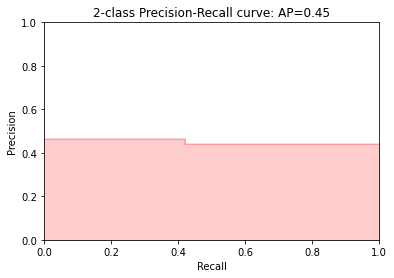

In [214]:

precision, recall, threshold = precision_recall_curve(y_test, pred)
average_precision = average_precision_score(y_test, pred)
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='r', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

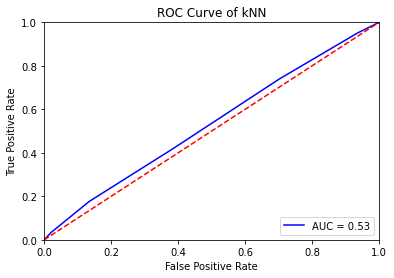

In [215]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [216]:
error_rate = []

for i in range(1,100): # Checking every possible k value between 1-100
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

#error_rate


Text(0, 0.5, 'Mean error rate')

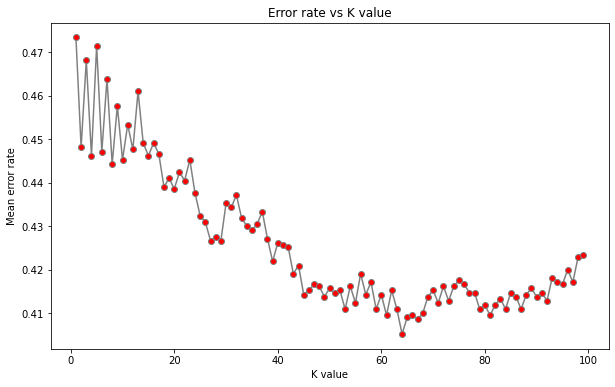

In [217]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100), error_rate, color='grey', marker='o', markerfacecolor='red')
plt.title('Error rate vs K value')
plt.xlabel('K value')
plt.ylabel('Mean error rate')

In [234]:
knn = KNeighborsClassifier(n_neighbors=64)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print ('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.5947619047619047


In [235]:
print (confusion_matrix(y_test, y_pred))


[[955 220]
 [631 294]]


In [236]:
print('precision_score',precision_score(y_test, y_pred))
print('recall',recall_score(y_test, y_pred))
print('f1_score',f1_score(y_test, y_pred))


precision_score 0.5719844357976653
recall 0.3178378378378378
f1_score 0.40861709520500344


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.48')

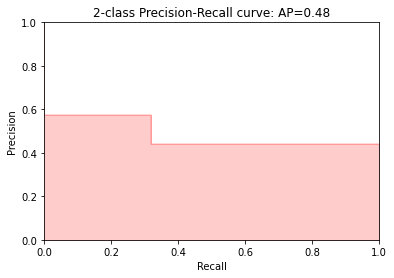

In [237]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='r', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

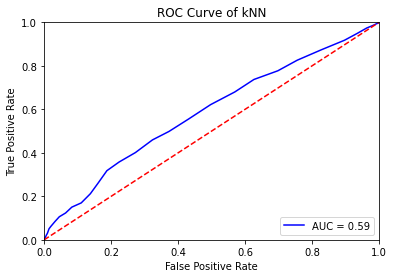

In [238]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [239]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.52333333 0.545      0.52333333 0.54833333 0.59666667 0.53166667
 0.52333333 0.53333333 0.515      0.54      ]
0.538


# random forest

In [240]:
# Training the algorithm
forest = RandomForestClassifier(n_estimators=100, random_state=101)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

In [241]:
# Evaluating the algorithm
print ('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.5461904761904762


In [80]:
# Grid search

grid_param = {  
    'n_estimators': [50, 80, 100, 120],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'max_depth': [10,30,50],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [3,9,20],
    'min_samples_leaf': [1, 2, 4]
    }

gs = GridSearchCV(estimator=forest,  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 30, 50],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [3, 9, 20],
                         'n_estimators': [50, 80, 100, 120]},
             scoring='accuracy')

In [227]:
print(gs.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 80}


In [242]:
# Training the tuned algorithm

forest_tuned = RandomForestClassifier(n_estimators=80,
                                      criterion= 'entropy',
                                      bootstrap= False,
                                      max_depth= 10,
                                      max_features= 'auto',
                                      min_samples_split= 20,
                                      min_samples_leaf= 1,
                                      random_state=10)
forest_tuned.fit(X_train, y_train)
y_pred = forest_tuned.predict(X_test)

In [243]:
# Evaluating the tuned algorithm
print ('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.5861904761904762


In [248]:
print (confusion_matrix(y_test, y_pred))

[[921 254]
 [615 310]]


In [249]:
print('precision_score',precision_score(y_test, y_pred))
print('recall',recall_score(y_test, y_pred))
print('f1_score',f1_score(y_test, y_pred))


precision_score 0.549645390070922
recall 0.33513513513513515
f1_score 0.41638683680322364


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.48')

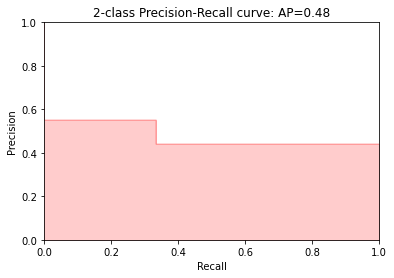

In [250]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='r', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

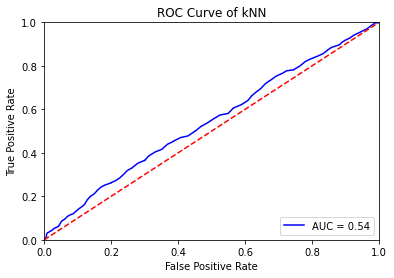

In [251]:
y_scores = forest.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

# decision tree

In [270]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.5223809523809524


In [271]:
print (confusion_matrix(y_test, y_pred))

[[652 523]
 [480 445]]


In [272]:
print('precision_score',precision_score(y_test, y_pred))
print('recall',recall_score(y_test, y_pred))
print('f1_score',f1_score(y_test, y_pred))


precision_score 0.4597107438016529
recall 0.4810810810810811
f1_score 0.4701531959852086


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.45')

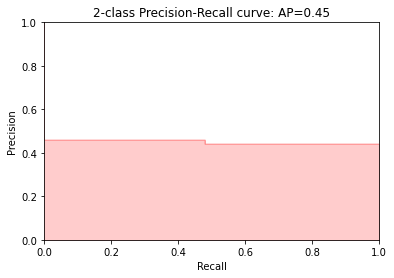

In [273]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='r', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

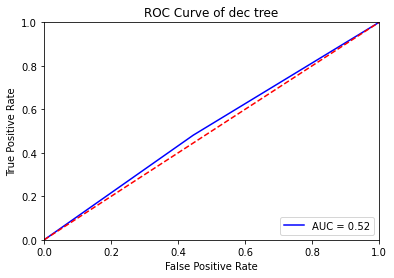

In [274]:
y_scores = clf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of dec tree')
plt.show()

In [275]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)
final_model = grid_search.best_estimator_
final_model

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    4.0s finished


DecisionTreeClassifier(ccp_alpha=0.001, max_depth=6, max_features='auto',
                       random_state=1024)

In [276]:
tree_clas=DecisionTreeClassifier(ccp_alpha=0.001, max_depth=6, max_features='auto',
                       random_state=1024)
tree_clas.fit(X_train, y_train)
y_pred = tree_clas.predict(X_test)
print ('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.5819047619047619


In [277]:
print('precision_score',precision_score(y_test, y_pred))
print('recall',recall_score(y_test, y_pred))
print('f1_score',f1_score(y_test, y_pred))


precision_score 0.5459882583170255
recall 0.3016216216216216
f1_score 0.3885793871866295


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.47')

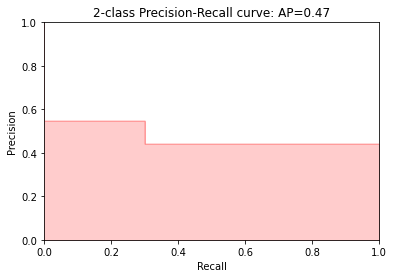

In [278]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='r', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

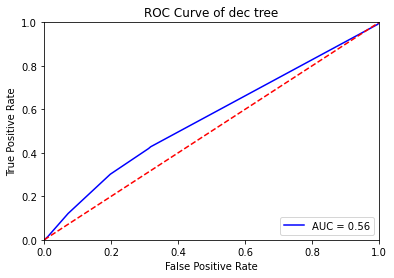

In [280]:
y_scores = tree_clas.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of dec tree')
plt.show()

In [347]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
print ('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.59


In [346]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.5843589743589742


In [349]:
logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))

score 0.59
